In [49]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
from src import Spotify
from src.utils import KMeans
from urllib.parse import urlencode, urlparse
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
sp = Spotify()

sp.search()
sp.get_genres()
sp.get_features()
sp.get_recommend(get_bak=True)

reco_sp = Spotify(sp.reco_tracks)
reco_sp.get_features()

계속하시려면 아무거나, 종료는 exit를 입력해주세요.exit


In [51]:
from sklearn.metrics import euclidean_distances as euc

my_features = sp.features.iloc[:, 1:].to_numpy()
reco_features = reco_sp.features.iloc[:,1:].to_numpy()

all_features = np.append(my_features, reco_features, axis=0)

_min = all_features.min(axis=0)
_max = all_features.max(axis=0)
norm_features = (all_features - _min) / (_max - _min)

ECV 59%
ECV 65%
ECV 67%
ECV 67%
ECV 67%
ECV 67%
ECV 67%
ECV 68%
ECV 68%
ECV 68%
ECV 68%
ECV 68%
ECV 68%
ECV 68%


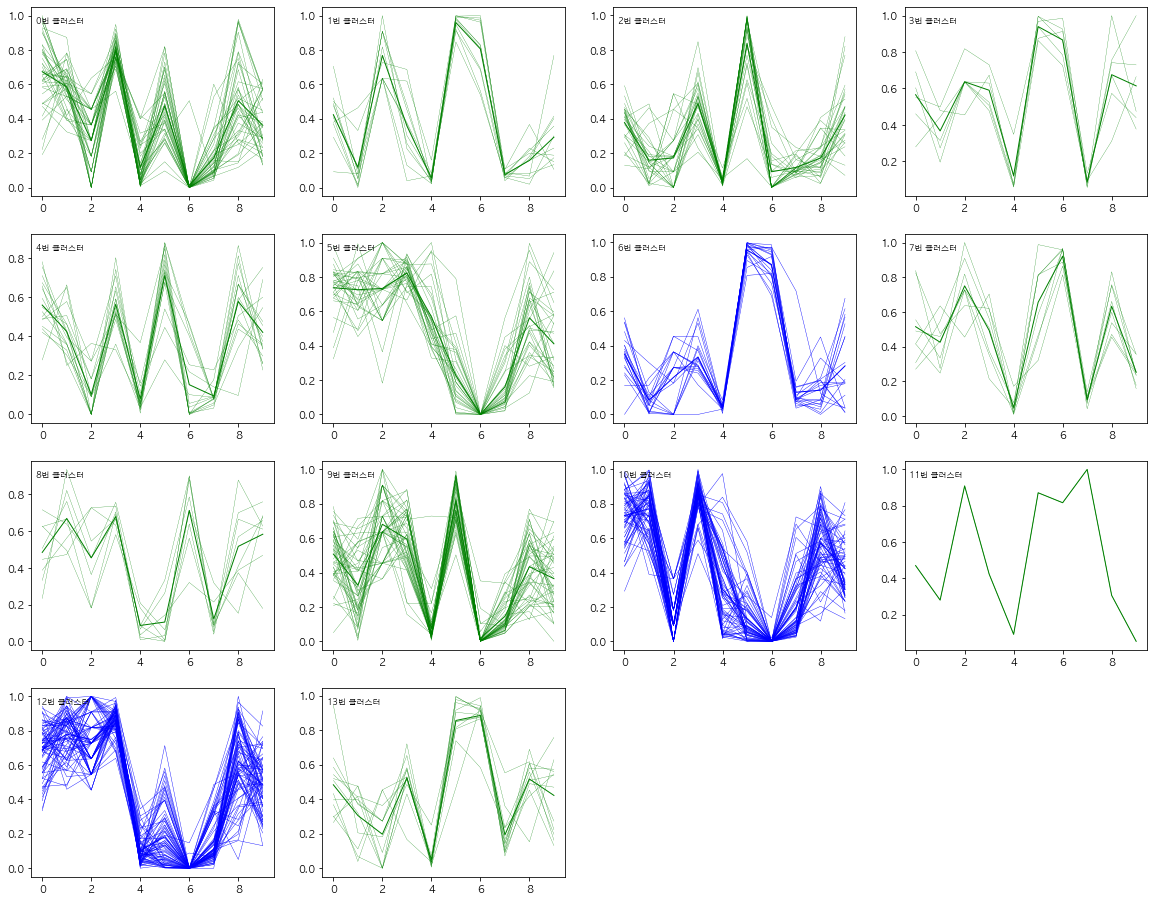

In [64]:
kmeans = KMeans(datas=norm_features)
kmeans.fit()
kmeans.cluster_plot(color_labels=np.unique(kmeans.labels_[:4]))

In [65]:
reco_labels = np.unique(kmeans.labels_[:4])

In [66]:
chk_features = reco_sp.sel_tracks.copy()

chk_features.head()

,trackId,trackName,artistIds,artistName,image,seedId
0,08rTZ8jNknn8VBS3v2o8pT,Lullaby Of The Leaves - 1998 Digital Remaster,"6l40OFJhuTbHQ9V12evc9K,3rxeQlsv0Sc2nyYaZ5W71T","Gerry Mulligan,Chet Baker",https://i.scdn.co/image/ab67616d0000b273ec8a5b...,3w9HSuLDejveVS9G8Qj8i0
1,0ixkhcM6hrxjyNQc8OoHBd,BAMN (Prod. by millic),0LyfQWJT6nXafLPZqxe9Of,Various Artists,https://i.scdn.co/image/ab67616d0000b2733c12fb...,3w9HSuLDejveVS9G8Qj8i0
2,7K35gNl1ANbPHJGBt3mrpb,SUPERBEEWHY (Prod. by BewhY),0LyfQWJT6nXafLPZqxe9Of,Various Artists,https://i.scdn.co/image/ab67616d0000b2737936fa...,3w9HSuLDejveVS9G8Qj8i0
3,5TcHjKKy8xoNZx0JrnUtO5,Distance,5ZjBaiZiRUZx4AmlzOOc9R,Junoflo,https://i.scdn.co/image/ab67616d0000b273a64787...,3w9HSuLDejveVS9G8Qj8i0
4,13PqmoiHO8rzblmaNFHY4g,Essence of Sapphire,0cmWgDlu9CwTgxPhf403hb,Bonobo,https://i.scdn.co/image/ab67616d0000b273848936...,3w9HSuLDejveVS9G8Qj8i0


In [68]:
chk_features[np.isin(kmeans.labels_[4:],reco_labels)]['seedId'].value_counts()

5quFr5s5PXYfUX5jV2EBZ1    58
2SMq0lOqCTHayWa9juoI0d    45
3w9HSuLDejveVS9G8Qj8i0    41
6guxIn9kHpncfdkrXn2CIQ    13
Name: seedId, dtype: int64